In [263]:
from IPython.display import HTML
from fastai.vision.all import *
from fastai.vision.widgets import *

## Chilean Wildcats Image Classifier

Hello there!

This app is for classifying pictures of the following Chilean wildcats. 

1. [Gato Andino](https://en.wikipedia.org/wiki/Andean_mountain_cat)
1. [Gato de las pampas](https://en.wikipedia.org/wiki/Pampas_cat)
1. [Gato Huiña](https://en.wikipedia.org/wiki/Kodkod)

*A `resnet18` pretrained-model was fine-tuned using about 100 pictures of each wildcat.*

------------------------------

In [361]:
IMG = './images/'
file_names = {0: 'gato_andino.jpg',
              1: 'gato_pampas.jpg',
              2: 'gato_huina.jpg'}

out_wildcat = widgets.Output(layout={'border': '1px solid black'})

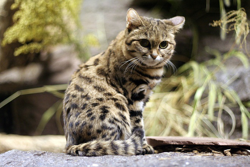

In [362]:
wildcat_examples = widgets.RadioButtons(
    options=[('Gato Andino', 0), ('Gato de las pampas', 1), ('Gato Huiña', 2)],
    value=0, # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
#    description='Look an example of this lovely wildcats:',
    disabled=False
)

with out_wildcat:
    img = PILImage.create(IMG + file_names[wildcat_examples.value])
    display(img.to_thumb(250,250))

# Useful resource: https://www.youtube.com/watch?v=8IYbdshUd9c (1:17:00)
def handler_radio_buttons(change):
    out_wildcat.clear_output()
    with out_wildcat:
        img = PILImage.create(IMG + file_names[wildcat_examples.value])
        display(img.to_thumb(250, 250))
    
wildcat_examples.observe(handler_radio_buttons, names='value')

In [363]:
widgets.HBox([
    widgets.VBox([
        widgets.Label('Look at an example of these lovely wildcats:'),
        wildcat_examples
    ]),    
    out_wildcat
])

In [364]:
# load the model in learn_inf
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'wildcat_model.pkl')

In [365]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [366]:
btn_run = widgets.Button(description='Classify')

In [369]:
# listener method:                      
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128,128))
    pred, idx, probs = learn_inf.predict(img)
    display(probs[idx])
    if probs[idx] < .5:
        lbl_pred.value = f' Are you sure that is an image of a wildcat? Sorry, the model does not have a confident prediction ({probs[idx]*100:02g}%) about this picture.'
        return None
    lbl_pred.value = f'Predicted {pred} with {probs[idx]*100:.01f}% certainty'
    
btn_run.on_click(on_click_classify)

In [368]:
VBox([
     widgets.Label('Upload your picture and press the classify button for the model prediction!'),
     btn_upload,
     btn_run,
     out_pl,
     lbl_pred
     ])